In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [1]:
import pandas as pd

'''let's create a function, feed the training and test data sets as an input, 
and at the output we will get a combined one, without an index'''
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

'''Let's create a function at the input of which we feed the combined data set, 
and at the output it returns the separated df of the training and test set, saved without a label'''
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)



'''The Python Pandas packages helps us work with our datasets. 
We start by acquiring the training and testing datasets into Pandas DataFrames. 
We also combine these datasets to run certain operations on both datasets together.
'''
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')  # load train data
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')  # load test data
df_all = concat_df(df_train, df_test)  # we apply the function described above, the union of two dataframes.

'''supplement the data sets with the name parameter'''
df_train.name = 'Training Set'  # set parameter for dataset - dataframe name
df_test.name = 'Test Set'  # set parameter for dataset - dataframe name
df_all.name = 'All Set'  # set parameter for dataset - dataframe name 

dfs = [df_train, df_test]

# display information about datasets
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe())
df_train.sample(5) 

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 81)
Training y Shape = 1460

Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
978,979,20,RL,68.0,9450,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Abnorml,110000
1231,1232,90,RL,70.0,7728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,132500
1081,1082,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,133000
173,174,20,RL,80.0,10197,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,COD,Normal,163000


/tmp/ipykernel_32/2154397526.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


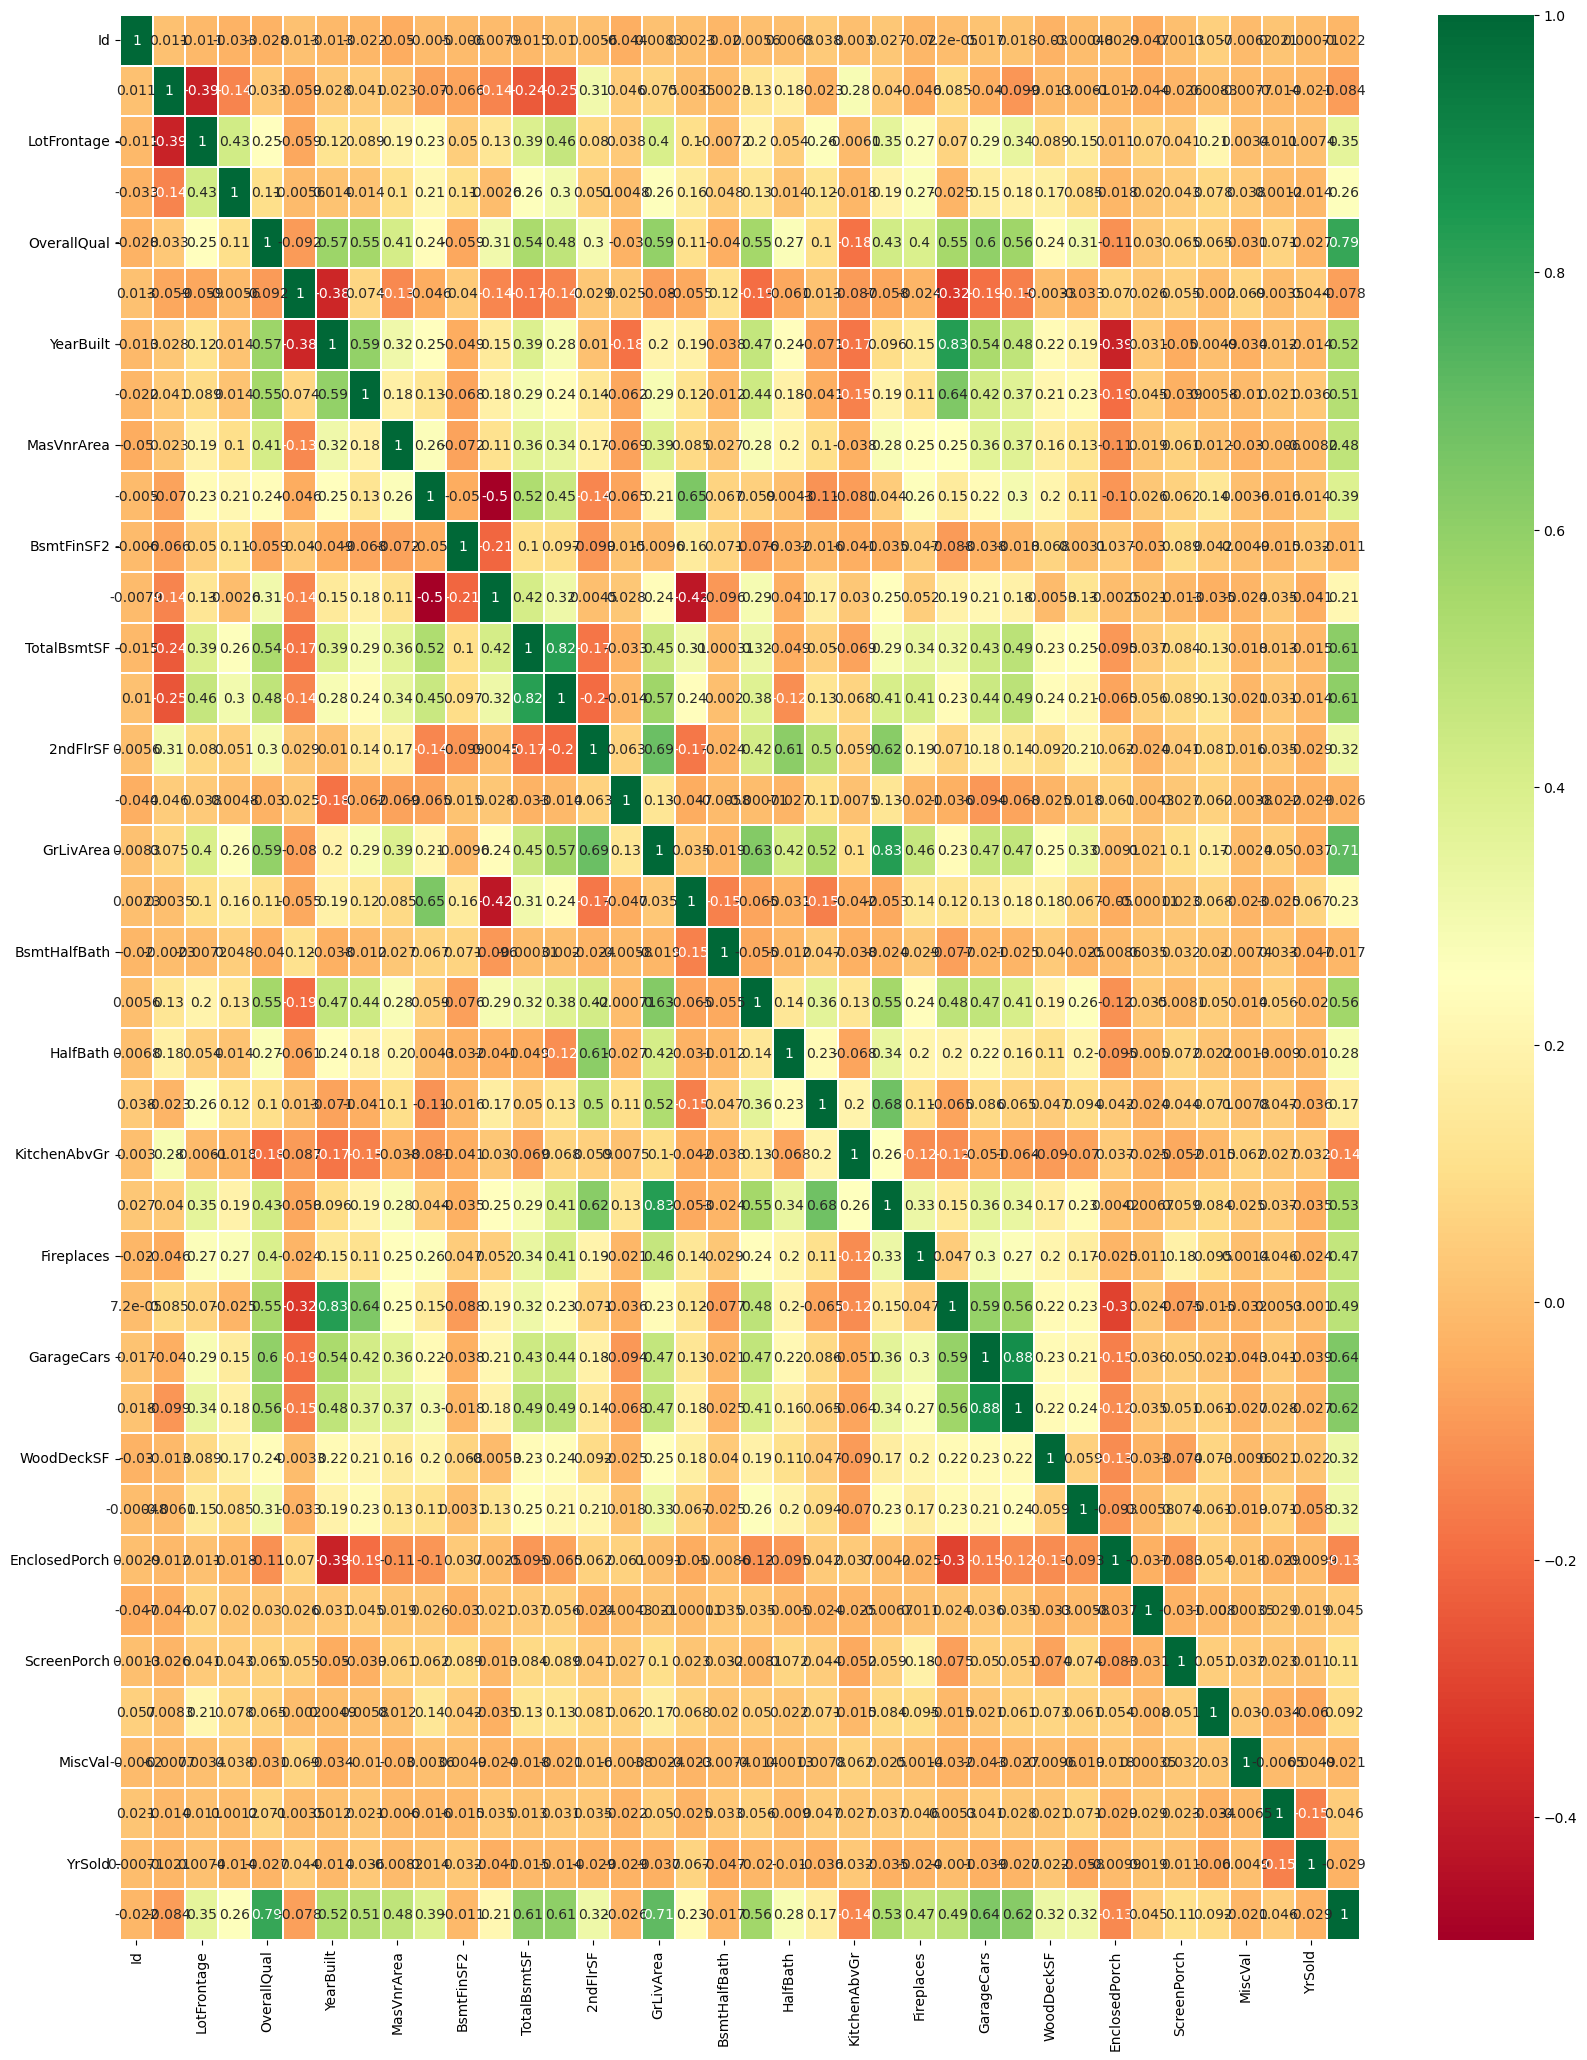

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Correlation Between The Features'''
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,25)
plt.show()  

Les varibales qui ont un lien avec SalesPrice (voir dernière colonne) sont :
- OverallQuall,GrLiveArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea

Je verifie qu'il n'y ai pas de lien entre ces variables pour ne pas qu'il y ai de redondances.
- OverallQuall à un lien fort (>0.5) avec garageCars, GarageArea, GrLiveArea, FullBath,YearBuilt,YearRemodAdd,TotalBsmtSF

Il ne reste plus que :
- 1stFlrSF,TotRmsAbvGrd,MasVnrArea

In [9]:
## Voir les missing values

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
Id column missing values: 0
MSSubClass column missing values: 0
MSZoning column missing values: 0
LotFrontage column missing values: 259
LotArea column missing values: 0
Street column missing values: 0
Alley column missing values: 1369
LotShape column missing values: 0
LandContour column missing values: 0
Utilities column missing values: 0
LotConfig column missing values: 0
LandSlope column missing values: 0
Neighborhood column missing values: 0
Condition1 column missing values: 0
Condition2 column missing values: 0
BldgType column missing values: 0
HouseStyle column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
RoofStyle column missing values: 0
RoofMatl column missing values: 0
Exterior1st column missing values: 0
Exterior2nd column missing values: 0
MasVnrType column missing values: 8
MasVnrArea column missing values: 8
ExterQual column missing values: 

In [10]:
df_train[["SaleType", "SalePrice"]].groupby(['SaleType'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,SaleType,SalePrice
6,New,274945.418033
2,Con,269600.000000
1,CWD,210600.000000
4,ConLI,200390.000000
8,WD,173401.836622
0,COD,143973.255814
5,ConLw,143700.000000
3,ConLD,138780.888889
7,Oth,119850.000000


In [11]:
df_train[["SaleCondition", "SalePrice"]].groupby(['SaleCondition'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,SaleCondition,SalePrice
5,Partial,272291.752000
4,Normal,175202.219533
2,Alloca,167377.416667
3,Family,149600.000000
0,Abnorml,146526.623762
1,AdjLand,104125.000000


In [3]:
## Encoder les variable categorique de train et test

from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Applying level encoding on each column with categorical data
train_ds = df_train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' and (col.name == 'SaleCondition' or col.name == 'SaleType') else col)
test_ds = df_test.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' and (col.name == 'SaleCondition' or col.name == 'SaleType') else col)

In [79]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [80]:

# Supposons que vous ayez un DataFrame appelé 'df_train' contenant vos données
# et que vous ayez déjà identifié les colonnes catégorielles dans la liste 'categorical_columns'

for cat_column in categorical_columns:
    # Groupez par la colonne catégorielle et calculez la moyenne des valeurs dans 'SalePrice'
    grouped_data = df_train[[cat_column, 'SalePrice']].groupby([cat_column], as_index=False).mean()
    
    # Triez les données par 'SalePrice' de manière décroissante
    sorted_data = grouped_data.sort_values(by='SalePrice', ascending=False)
    
    print(f"Moyenne des prix de vente par '{cat_column}':")
    print(sorted_data)
    print("\n")


Moyenne des prix de vente par 'MSZoning':
  MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000


Moyenne des prix de vente par 'Street':
  Street      SalePrice
1   Pave  181130.538514
0   Grvl  130190.500000


Moyenne des prix de vente par 'Alley':
  Alley      SalePrice
1  Pave  168000.585366
0  Grvl  122219.080000


Moyenne des prix de vente par 'LotShape':
  LotShape      SalePrice
1      IR2  239833.365854
2      IR3  216036.500000
0      IR1  206101.665289
3      Reg  164754.818378


Moyenne des prix de vente par 'LandContour':
  LandContour      SalePrice
1         HLS  231533.940000
2         Low  203661.111111
3         Lvl  180183.746758
0         Bnk  143104.079365


Moyenne des prix de vente par 'Utilities':
  Utilities     SalePrice
0    AllPub  180950.95682
1    NoSeWa  137500.00000


Moyenne des prix de vente par 'LotConfig':
  LotConfig      SalePrice
1   CulDSac  2238

In [2]:
## Encoder les variable categorique de train et test

from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Applying level encoding on each column with categorical data
train_ds = df_train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
test_ds = df_test.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [99]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

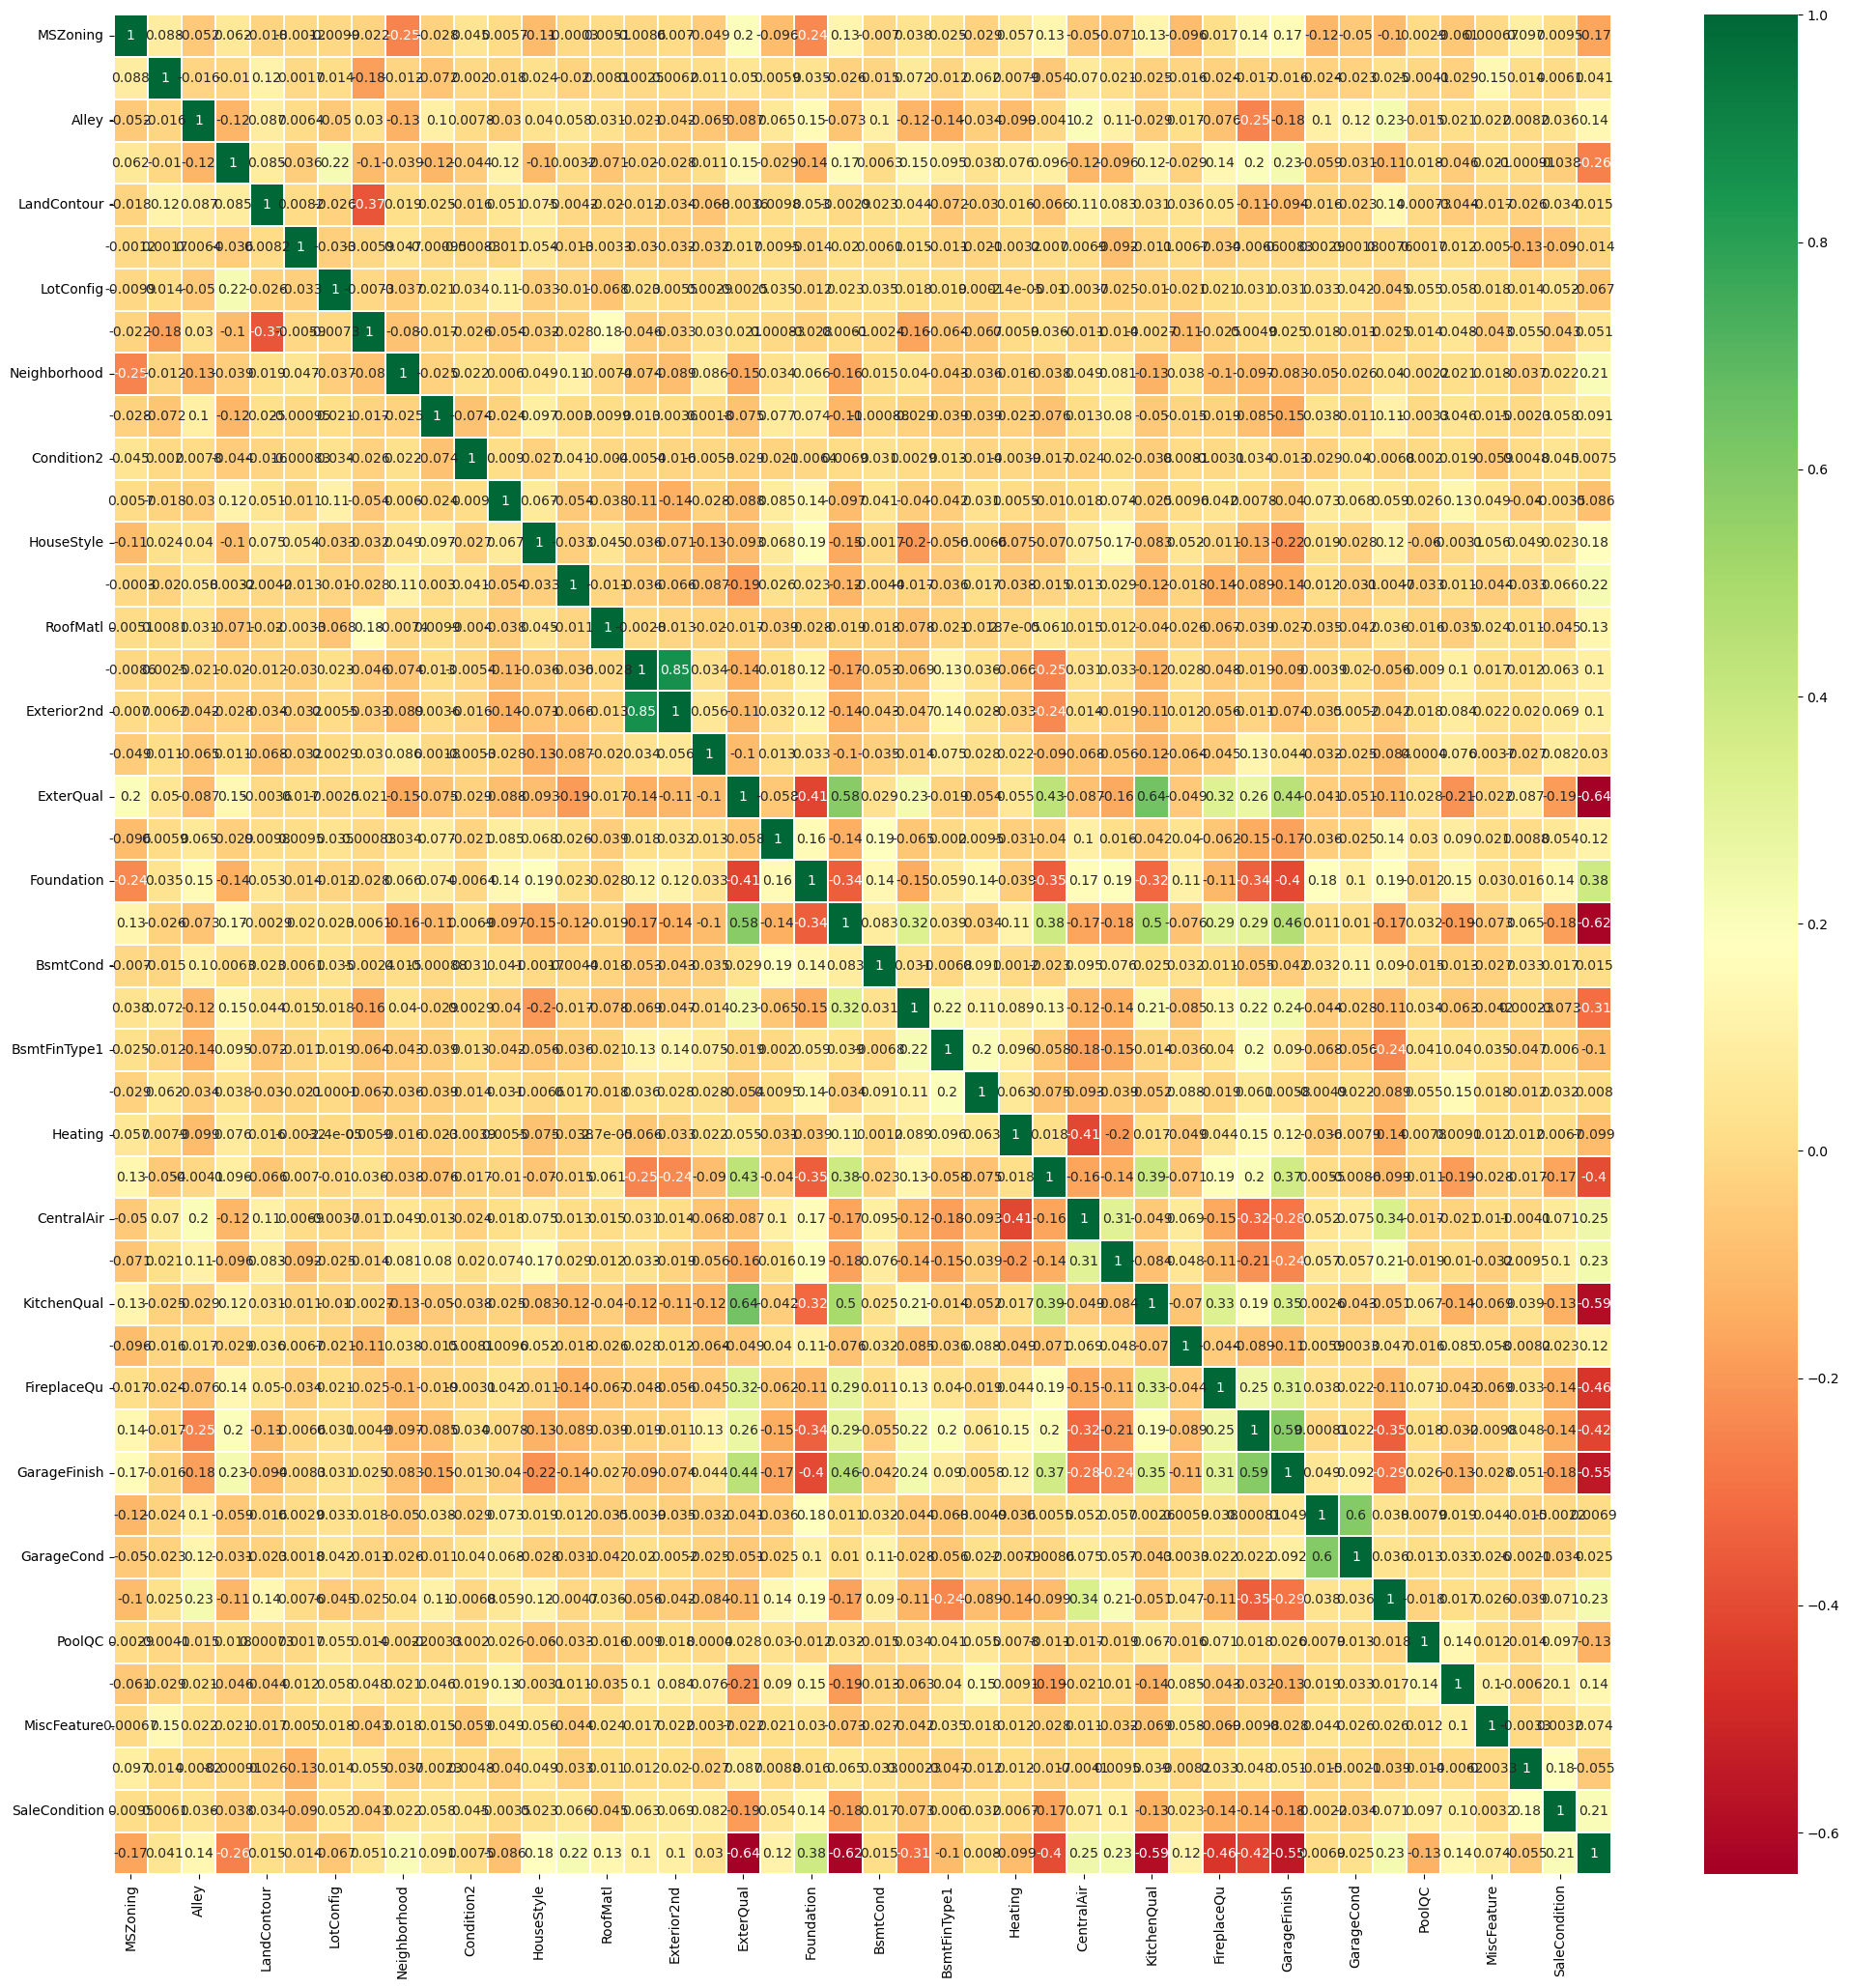

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez un DataFrame appelé 'df_train' contenant vos données
# et que vous ayez déjà identifié les colonnes catégorielles dans la liste 'categorical_columns'

# Sélectionnez uniquement les colonnes catégorielles dans le DataFrame
categorical_df = train_ds[categorical_columns + ['SalePrice']]

'''Correlation Between The Features'''
sns.heatmap(categorical_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()  

Variables categorielles avec fort lien < -0.5 :
- ExterQual, BsmtQual,KitchenQual,GarageFinish

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor

# Prepare the feature matrix and target variable for training
X = train_ds[['OverallQual','SaleType','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']]
y = train_ds['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=5)

# Create and train the linear regression model
model =  AdaBoostRegressor(
    base_estimator=base_model,  # Modèle de base
    n_estimators=100,            # Nombre d'estimateurs (arbres)
    learning_rate=0.1,           # Taux d'apprentissage
    random_state=42              # Graine aléatoire pour la reproductibilité
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1580569126.6716986
R-squared Score: 0.7939371698180582


In [36]:
prediction = model.predict(test_ds[['OverallQual','SaleType','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']])
print("Prédiction :", prediction)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
df_predictions = pd.DataFrame({'Id': test_ds["Id"], 
                               'SalePrice': prediction})
df_predictions.head(10)

,Id,SalePrice
0,1461,123645.445312
1,1462,157685.578125
2,1463,158394.546875
3,1464,178532.468750
4,1465,208627.515625
5,1466,181741.437500
6,1467,169356.156250
7,1468,173866.656250
8,1469,189585.437500
9,1470,111426.281250


In [48]:
df_predictions.to_csv('test_7.csv', index=False)